In [148]:
from sklearn.metrics import silhouette_score
from pandas.plotting import parallel_coordinates
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       
from sklearn.decomposition import PCA

In [42]:
data = pd.read_csv('customer_segmentation.csv')

In [43]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


In [44]:
dates = ['order_purchase_timestamp', 'order_approved_at', 'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

CONVERTING THE VARIABLES INTO DATE BY USING PANDAS:

In [45]:
for i in dates:
    data[i] = pd.to_datetime(data[i])

In [46]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.90,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.70,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26,boleto,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-07-20 13:30:36,19.99,7.40,sao paulo,SP,livros_importados,53,80,books_imported
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-05-11 20:51:50,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-05-04 14:53:18,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported
13799,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-07-16 22:45:43,44.99,7.58,sao paulo,SP,livros_importados,53,568,books_imported


WE CAN ALSO DISTINCT DATE FROM TIME:

In [47]:
data['order_date'] = [d.date() for d in data['order_purchase_timestamp']]
data['order_time'] = [d.time() for d in data['order_purchase_timestamp']]

In [48]:
data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english,order_date,order_time
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26,boleto,1,...,19.99,7.40,sao paulo,SP,livros_importados,53,80,books_imported,2018-07-15,09:56:32
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17,credit_card,1,...,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported,2018-05-07,20:36:47
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14,credit_card,1,...,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported,2018-04-28,14:32:54
13799,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20,credit_card,1,...,44.99,7.58,sao paulo,SP,livros_importados,53,568,books_imported,2018-07-11,22:27:32
13800,73d60420cd1a179b2d8887d538efe4c2,65d9213dfa004c17dc126503e106e4a3,delivered,2018-08-07 10:52:58,2018-08-07 11:05:18,2018-08-08 08:31:00,2018-08-22 17:02:23,2018-09-04,credit_card,10,...,749.00,55.96,rio de janeiro,RJ,livros_importados,57,3694,books_imported,2018-08-07,10:52:58


In [49]:
data.shape

(13801, 28)

In [50]:
data.describe()  #Dataset visualization with all the values

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


In [51]:
data.columns  #Columns of the dataset 

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_category_name_english',
       'order_date', 'order_time'],
      dtype='object')

In [52]:
data.nunique()  #The output of number of unique values is returned

order_id                         11394
customer_id                      11394
order_status                         5
order_purchase_timestamp         11361
order_approved_at                10759
order_delivered_carrier_date      8851
order_delivered_customer_date    11161
order_estimated_delivery_date      156
payment_type                         4
payment_installments                19
payment_value                     7764
customer_unique_id               11247
customer_city                     1728
customer_state                      27
order_item_id                       13
product_id                        6915
seller_id                         1616
shipping_limit_date              11228
price                             2092
freight_value                     3319
seller_city                        395
seller_state                        18
product_category_name               66
product_name_lenght                 56
product_description_lenght        1951
product_category_name_eng

In [53]:
data['order_id'].unique()

array(['53cdb2fc8bc7dce0b6741e2150273451',
       '86674ccaee19790309333210917b2c7d',
       'aee682982e18eb4714ce9f97b15af5e2', ...,
       '33f8dfc5a51063c31d7b12e9d43a45fc',
       '442a41b00a8a8bda35511fdf1eb65cc5',
       '73d60420cd1a179b2d8887d538efe4c2'], dtype=object)

In [54]:
data['seller_city'].unique()

array(['belo horizonte', 'sao goncalo', 'limeira', 'santo andre',
       'ribeirao preto', 'brasilia', 'mococa', 'campinas', 'sao paulo',
       'praia grande', 'salto', 'rio de janeiro', 'betim', 'apucarana',
       'umuarama', 'petropolis', 'videira', 'presidente prudente',
       'novo hamburgo', 'congonhal', 'taboao da serra', 'araucaria',
       'indaiatuba', 'riberao preto', 'sao  paulo', 'birigui', 'criciuma',
       'navegantes', 'carapicuiba', 'vicente de carvalho', 'guaruja',
       'sinop', 'bauru', 'suzano', 'mogi das cruzes', 'valinhos',
       'nova friburgo', 'guarulhos', 'extrema', 'santa catarina',
       'lagoa da prata', 'campos dos goytacazes', 'morrinhos', 'atibaia',
       'franca', 'londrina', 'mogi mirim', 'sao carlos', 'curitiba',
       'ponta grossa', 'campo mourao', 'americana', 'itajai',
       'santo andre/sao paulo', 'sao bernardo do campo', 'bombinhas',
       'teresopolis', 'piracicaba', 'hortolandia', 'santos',
       'sao jose do rio preto', 'ribeirao

In [55]:
data.isnull().sum()  #The sum of th enull values for each variable

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
seller_city                      0
seller_state                     0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_category_name_english    0
order_date                       0
order_time                       0
dtype: int64

WE CAN REMOVE THE DUPLICATES 

In [56]:
data.duplicated().sum()
data.drop_duplicates(keep='first', inplace=True)
data.reset_index(drop=True, inplace=True)  #resetting the index of the dataframe

OUTLIERS ANALYSIS

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

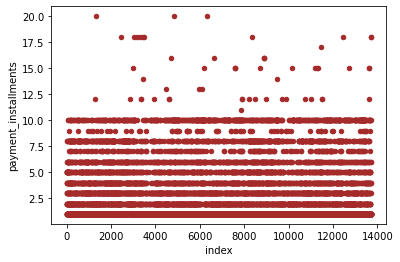

<Figure size 432x288 with 0 Axes>

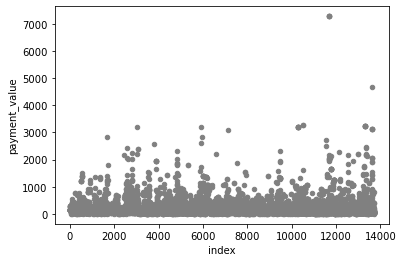

<Figure size 432x288 with 0 Axes>

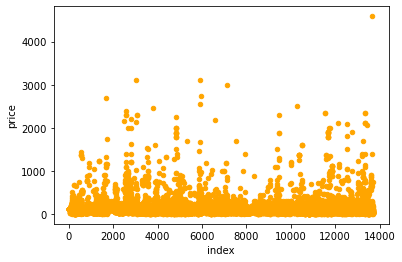

<Figure size 432x288 with 0 Axes>

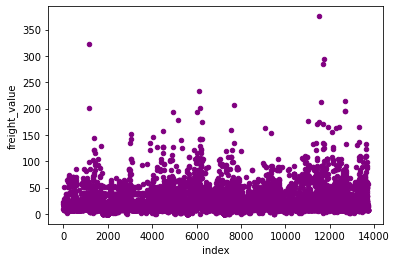

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure()
data.reset_index().plot(kind='scatter', x='index',
                      y='payment_installments', c='brown')

plt.figure() 
data.reset_index().plot(kind='scatter', x='index', y='payment_value', c='gray')

plt.figure()
data.reset_index().plot(kind='scatter', x='index', y='price', c='orange')

plt.figure()
data.reset_index().plot(kind='scatter', x='index', y='freight_value', c='purple')
plt.figure()

We analyze the 'payment_value' variable because in our mind is one of the most interesting and important variable to study for a big store store like the one in our case. Since it seems having some values that exceed the average, we can suppose that there are some customers who have paid an amount of money which is relatively higher than the other and this can affect our analysis in the future.

In [58]:
mean_pv = data["payment_value"].mean()  #result mean = 195
std_pv = data["payment_value"].std()    #result Standard Deviation = 295.5
print(mean_pv)
print(std_pv) 

195.20144627496734
295.4593435200087


Taking a look at the scatterplot of the outliers, we can notice that there are few payments above (around) 3500$, so we want as an output all the payments above that amount:

In [59]:
outlier1 = data[data['payment_value'] > 3500]
print('\nOutlier dataframe:\n', outlier1)

#the output will be 5 payments, each one with all its attributes.


Outlier dataframe:
                                order_id                       customer_id  \
11673  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11674  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11675  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
11676  736e1922ae60d0d6a89247b851902527  ec5b2ba62e574342386871631fafd3fc   
13638  8dbc85d1447242f3b127dda390d56e19  3d979689f636322c62418b6346b1c6d2   

      order_status order_purchase_timestamp   order_approved_at  \
11673    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11674    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11675    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
11676    delivered      2018-07-15 14:49:44 2018-07-17 04:31:36   
13638    delivered      2018-06-22 12:23:19 2018-06-22 12:36:36   

      order_delivered_carrier_date order_delivered_customer_date  \
11673          2018-07-20 13:09:00           

We now delete those outliers as they're not relevant for out analysis:

In [60]:
data = data.drop(data[data.payment_value > 3500].index)
data = data.reset_index(drop=True) 

RELATIONSHOP ANALYSIS:

CORRELATION:

In [61]:
correlation = data.corr() 

We can print an heatmap matrix in order to visualize clearly the correlation between each couple of variables:

<AxesSubplot:>

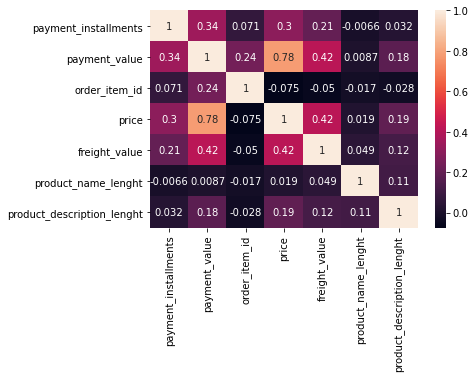

In [62]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

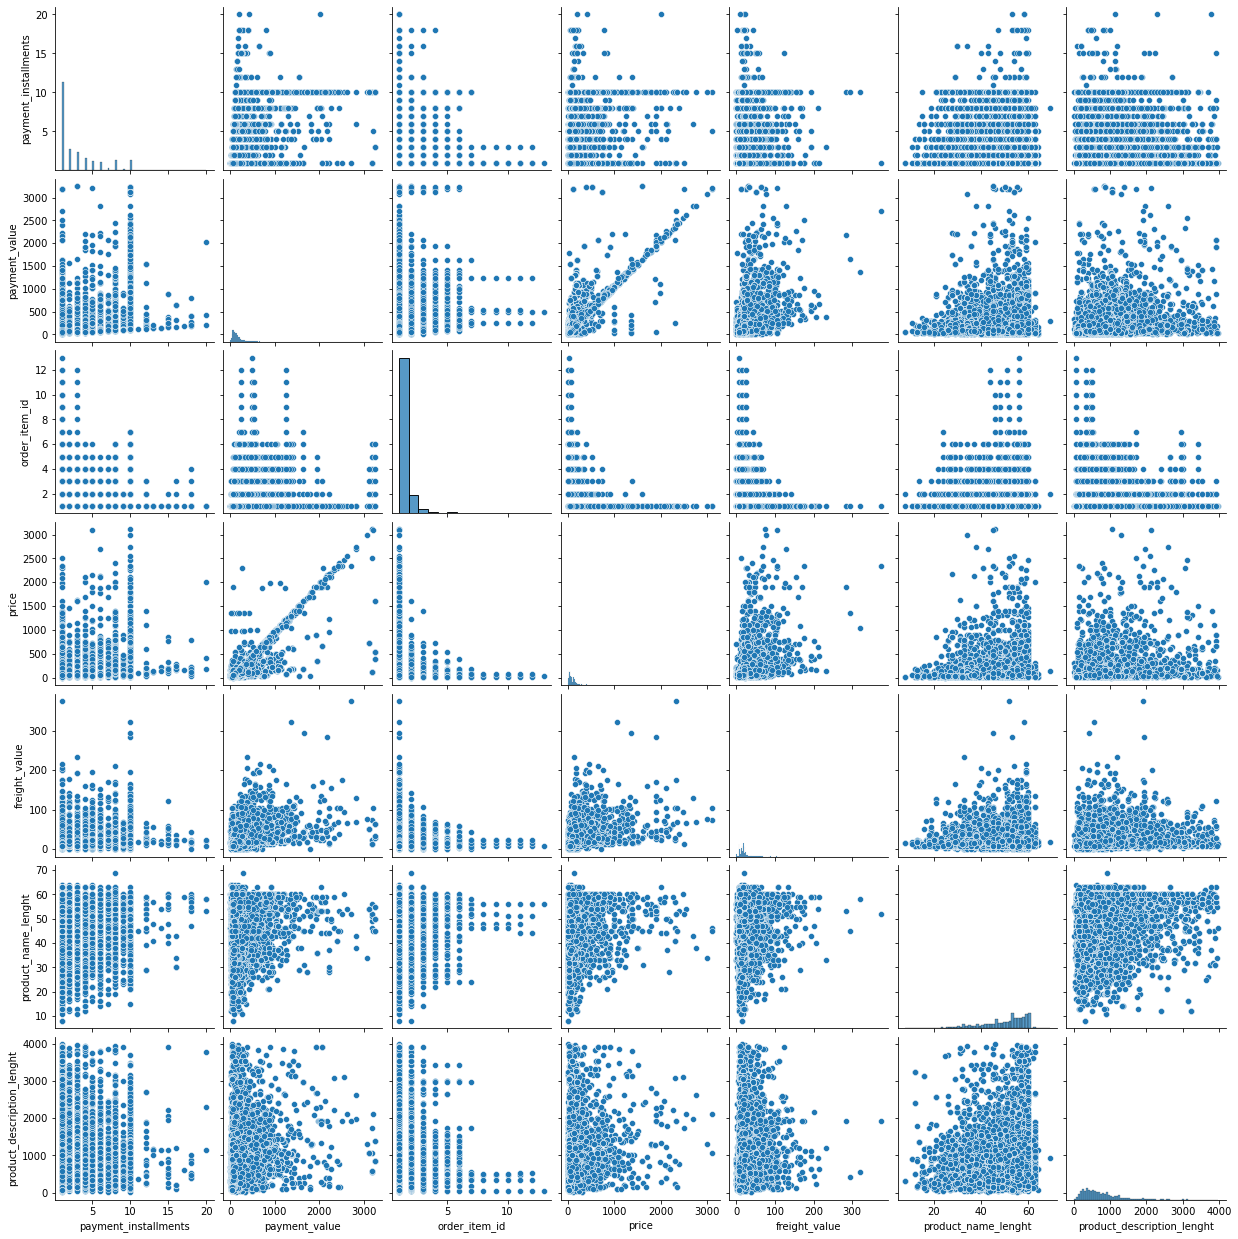

In [63]:
sns.pairplot(data)  #This method allows us allows us to plot pairwise relationships between variables within a large dataset dataset like ours, so that we can visualize everything in one figure.

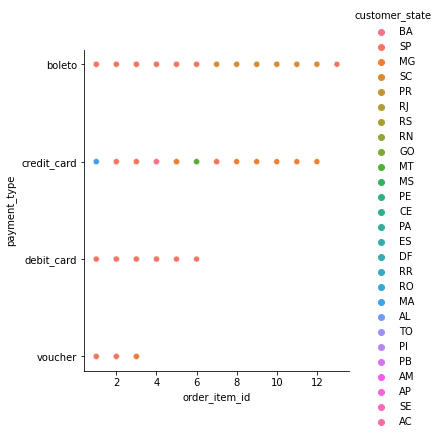

In [64]:
sns.relplot(x = 'order_item_id', y = 'payment_type', hue = 'customer_state', data = data)

/Users/albert/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

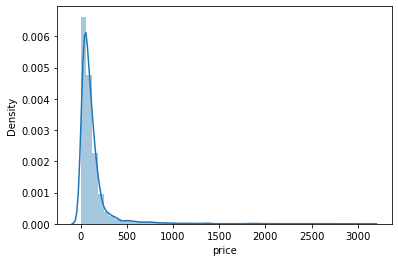

In [65]:
sns.distplot(data['price'])  #Seaborn Distplot represents the overall distribution of continuous data variables.

WHERE DO MOST CUSTOMERS COME FROM?

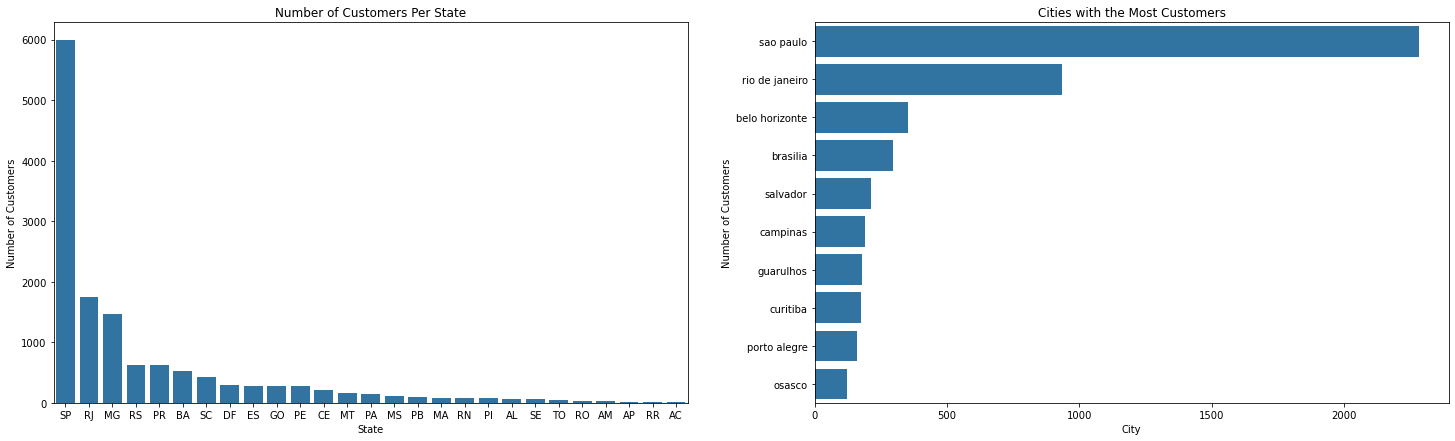

In [71]:
state_data = data.groupby('customer_state').count()['customer_id'].reset_index()
city_data = data.groupby('customer_city').count()['customer_id'].reset_index()

plt.figure(figsize = (25,7))

plt.subplot(121)
base_color = sns.color_palette()[0]

sns.barplot(data = state_data.sort_values('customer_id', ascending = False), x = 'customer_state', y = 'customer_id', color = base_color)
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.subplot(122)
base_color = sns.color_palette()[0]

sns.barplot(data = city_data.sort_values('customer_id', ascending = False).nlargest(10,'customer_id'), x = 'customer_id', y = 'customer_city', color = base_color)
plt.title('Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers');

Here we can see that the state with the higher amount of customers is SP, while the city is Sao Paulo

WHAT ARE THE MOST FREQUENT ITEMS BOUGHT?

In [72]:
best_seller_p = data['product_category_name_english'].value_counts(
).reset_index().nlargest(10, 'product_category_name_english')
worst_seller_p = data['product_category_name_english'].value_counts(
).reset_index().nsmallest(10, 'product_category_name_english')
print(best_seller_p)
print(worst_seller_p)

                   index  product_category_name_english
0         bed_bath_table                           1386
1          health_beauty                           1382
2             housewares                           1121
3          watches_gifts                           1080
4         sports_leisure                            881
5  computers_accessories                            850
6        furniture_decor                            839
7                   auto                            662
8              telephony                            514
9           garden_tools                            425
                        index  product_category_name_english
62          cds_dvds_musicals                              1
63     tablets_printing_image                              1
64                    flowers                              1
65  fashion_childrens_clothes                              1
61               dvds_blu_ray                              3
60             hom

TOP 10 items bought:

Text(0, 0.5, 'Product Category')

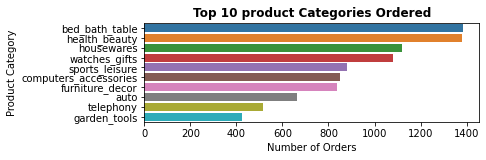

In [73]:
plt.subplot(211)
sns.barplot(data = best_seller_p, x = 'product_category_name_english',
            y = 'index')
plt.title('Top 10 product Categories Ordered', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

LOWEST 10 items bought:

Text(0, 0.5, 'Product Category')

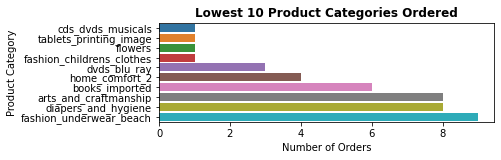

In [74]:
plt.subplot(212)
sns.barplot(data = worst_seller_p, x = 'product_category_name_english',
            y = 'index')
plt.title('Lowest 10 Product Categories Ordered', fontweight = 'bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

Bed and bath products are the top products ordered followed by beauty products and housewares.

Musical products have the lowest amount of products ordered, followed by flowers and children clothes.

WHICH ARE THE MOST COMMON PAYMENT TYPES?

In [75]:
payment_types = data['payment_type'].value_counts().reset_index() #count the number of different types of payment
print(payment_types)

         index  payment_type
0  credit_card         10319
1       boleto          2511
2      voucher           515
3   debit_card           368


WHICH ARE THE NUMBER OF ORDERS PER PAYMENT TYPE?

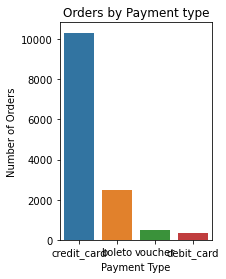

In [76]:
plt.subplot(121)
sns.barplot(data = payment_types, x = 'index', y = 'payment_type')
plt.title('Orders by Payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders');

WHICH IS THE NUMBER OF ORDERS WITH NUMBER OF PAYMENT INSTALLMENTS?

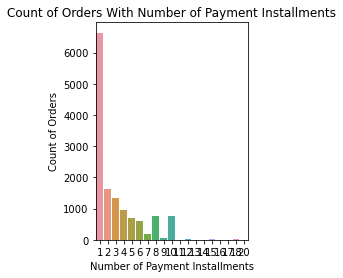

In [77]:
plt.subplot(122)
sns.barplot(data = data['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments')
plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders');

RFM ANALYSIS:

We start with RECENCY, which is the time since a customer's last purchase. It is calculated by subtracting the customer's last shopping date from each shopping timestamp:

In [78]:
data['recency'] = print((max(data['order_purchase_timestamp']) - data['order_purchase_timestamp']))

0        35 days 18:10:23
1        20 days 03:14:25
2        50 days 20:05:32
3         8 days 04:51:35
4         8 days 04:51:35
               ...       
13708    45 days 04:55:28
13709   113 days 18:15:13
13710   123 days 00:19:06
13711    48 days 16:24:28
13712    22 days 03:59:02
Name: order_purchase_timestamp, Length: 13713, dtype: timedelta64[ns]


As we only want to know the days since a customer's last purchase, we could have used directly the variable 'order_date' that we initialized at the beginning of the project, but we noticed that it seems to round up the days by considering if the time of the purchase is close to the next day or not, so we are leaving both methods for sake of completeness:

In [79]:
data['recency'] = (max(data['order_date']) - data['order_date'])

Furthermore, for the customers who made more than one purchase we will only consider the most recent purchase:

In [80]:
data['recency'] = data.groupby(['customer_unique_id'], as_index=False)['recency'].transform('min')

As a last step we will calculate mean, standard deviation, minimum value and maximum value for recency (we will do the same with the other two components of RFM):

In [81]:
data['recency'] = data['recency'].dt.days


In [82]:
print('mean: ', data['recency'].mean())
print('std: ', data['recency'].std())
print('max: ', data['recency'].max())
print('min: ', data['recency'].min())  

mean:  73.78378181287829
std:  42.44889156457327
max:  482
min:  0


FREQUENCY: This is the total number of purchases of the customer. In a different way, it gives the frequency of purchases made by the customer. We just count the number of purchases per customer, obviously considering each customer's unique id as a parameter:

In [83]:
data['frequency'] = data.groupby(['customer_unique_id'], as_index=False)['order_id'].transform('count')

In [84]:
print('mean: ', data['frequency'].mean())
print('std: ', data['frequency'].std())
print('max: ', data['frequency'].max())
print('min: ', data['frequency'].min())


mean:  1.5852840370451395
std:  1.2885963775263332
max:  13
min:  1


MONETARY: It is the total amount of money spent by the customer. It can be calculted by summing all the 'payment_values':

In [85]:
data['monetary'] = data.groupby(['customer_unique_id'], as_index=False)['payment_value'].transform('sum')

In [86]:
print('mean: ', data['monetary'].mean())
print('std: ', data['monetary'].std())
print('max: ', data['monetary'].max())
print('min: ', data['monetary'].min())

mean:  395.11181141982
std:  1090.5970502209364
max:  19457.04
min:  10.71


As you can see in the computation of Frequency and Monetary, the columns of 'order_id' and 'payment_value' are replaced by the result of the computation (sum and count), even if in the putput they might not have the name changed.

We now want to create a first segmentation of the customers based on the RFM. To do this we are going to convert ther RFM scores to a single variable from 1 to 5. We are going to choose the cluster a customer will be assigned to based on the values of mean, std, min and max.

RECENCY

In [97]:
data['recency_score'] = ''

In [98]:
for i in data.index:
    if data['recency'][i] <= 20:
        data['recency_score'][i] = 5
    elif (data['recency'][i] > 20) and (data['recency'][i] <= 65): 
        data['recency_score'][i] = 4
    elif (data['recency'][i] > 65) and (data['recency'][i] <= 120):
        data['recency_score'][i] = 3
    elif (data['recency'][i] > 120) and (data['recency'][i] <= 200):
        data['recency_score'][i] = 2
    elif (data['recency'][i] > 200): 
        data['recency_score'][i] = 1  

<ipython-input-98-17f41bb00f87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency_score'][i] = 4
<ipython-input-98-17f41bb00f87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency_score'][i] = 5
<ipython-input-98-17f41bb00f87>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['recency_score'][i] = 3
<ipython-input-98-17f41bb00f87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In this case, talking about recency, we know that the mean is 72 days, so we thought that giving 4 to those customers that haven't bought for 20-65 days was the best option. For the other intervals of time, we kept it quite large considering that the strandard deviation for this score is 42 days.

In [99]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_category_name_english,order_date,order_time,recency,frequency,monetary,recency_score,frequency_score
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1,...,29,178,perfumery,2018-07-24,20:41:37,36,1,141.46,4,1
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,credit_card,5,...,29,178,perfumery,2018-08-09,11:37:35,20,1,135.82,5,1
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,boleto,1,...,29,178,perfumery,2018-07-09,18:46:28,25,2,254.27,4,2
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,29,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,29,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26,boleto,1,...,53,80,books_imported,2018-07-15,09:56:32,45,1,27.39,4,1
13709,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17,credit_card,1,...,53,80,books_imported,2018-05-07,20:36:47,114,1,26.38,3,1
13710,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14,credit_card,1,...,53,80,books_imported,2018-04-28,14:32:54,123,1,26.38,2,1
13711,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20,credit_card,1,...,53,568,books_imported,2018-07-11,22:27:32,49,1,52.57,4,1


FREQUENCY

In [100]:
data['frequency_score'] = ''


In [101]:
for i in data.index:
    if data['frequency'][i] >= 9:
        data['frequency_score'][i] = 5
    elif (data['frequency'][i] > 7) and (data['frequency'][i] < 9):
        data['frequency_score'][i] = 4
    elif (data['frequency'][i] >= 5) and (data['frequency'][i] < 7):
        data['frequency_score'][i] = 3
    elif (data['frequency'][i] >= 2) and (data['frequency'][i] < 5):
        data['frequency_score'][i] = 2
    elif (data['frequency'][i] == 1):
        data['frequency_score'][i] = 1

<ipython-input-101-a3beab8c4ddf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['frequency_score'][i] = 1
<ipython-input-101-a3beab8c4ddf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['frequency_score'][i] = 2
<ipython-input-101-a3beab8c4ddf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['frequency_score'][i] = 3
<ipython-input-101-a3beab8c4ddf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [102]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_category_name_english,order_date,order_time,recency,frequency,monetary,recency_score,frequency_score
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1,...,29,178,perfumery,2018-07-24,20:41:37,36,1,141.46,4,1
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,credit_card,5,...,29,178,perfumery,2018-08-09,11:37:35,20,1,135.82,5,1
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,boleto,1,...,29,178,perfumery,2018-07-09,18:46:28,25,2,254.27,4,2
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,29,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,29,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26,boleto,1,...,53,80,books_imported,2018-07-15,09:56:32,45,1,27.39,4,1
13709,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17,credit_card,1,...,53,80,books_imported,2018-05-07,20:36:47,114,1,26.38,3,1
13710,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14,credit_card,1,...,53,80,books_imported,2018-04-28,14:32:54,123,1,26.38,2,1
13711,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20,credit_card,1,...,53,568,books_imported,2018-07-11,22:27:32,49,1,52.57,4,1


With frequency we have been a little bit more 'generous' because, considering that the maximum amount of items bought is 13 and that, on average, the items bought are between 1 anmd 2, we think that a customer who bought more than 9 items can be considered a customer of level 5

MONETARY

In [103]:
data['monetary_score'] = ''


In [104]:
for i in data.index:
    if data['monetary'][i] > 500:
        data['monetary_score'][i] = 5
    elif (data['monetary'][i] > 250) and (data['monetary'][i] <= 500):
        data['monetary_score'][i] = 4
    elif (data['monetary'][i] > 150) and (data['monetary'][i] <= 250):
        data['monetary_score'][i] = 3
    elif (data['monetary'][i] > 100) and (data['monetary'][i] <= 150):
        data['monetary_score'][i] = 2
    elif (data['monetary'][i] <= 100):
        data['monetary_score'][i] = 1 

<ipython-input-104-38e36a3bc303>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monetary_score'][i] = 2
<ipython-input-104-38e36a3bc303>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monetary_score'][i] = 4
<ipython-input-104-38e36a3bc303>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['monetary_score'][i] = 5
<ipython-input-104-38e36a3bc303>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [105]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,product_description_lenght,product_category_name_english,order_date,order_time,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,boleto,1,...,178,perfumery,2018-07-24,20:41:37,36,1,141.46,4,1,2
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22,credit_card,5,...,178,perfumery,2018-08-09,11:37:35,20,1,135.82,5,1,2
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18,boleto,1,...,178,perfumery,2018-07-09,18:46:28,25,2,254.27,4,2,4
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2,5
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10,credit_card,2,...,178,perfumery,2018-08-21,10:00:25,8,2,558.60,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26,boleto,1,...,80,books_imported,2018-07-15,09:56:32,45,1,27.39,4,1,1
13709,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17,credit_card,1,...,80,books_imported,2018-05-07,20:36:47,114,1,26.38,3,1,1
13710,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14,credit_card,1,...,80,books_imported,2018-04-28,14:32:54,123,1,26.38,2,1,1
13711,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20,credit_card,1,...,568,books_imported,2018-07-11,22:27:32,49,1,52.57,4,1,1


We are now going to create columns in order to group all the scores. Then, we extracted from the original dataset only the columns of interest so that we can have a better visualization, keeping only the customer id.

In [118]:
#Recency:
data["recency_score"] = pd.qcut(data['recency'], 5, labels=[5, 4, 3, 2, 1])
#Frequency:
data["frequency_score"] = pd.qcut(data["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#Monetary:
data["monetary_score"]= pd.qcut(data["monetary"],5,labels=[1,2,3,4,5])

rfm_data = data[[ 'recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score']]

rfm_data.head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,36,1,141.46,4,1,3
1,20,1,135.82,5,1,3
2,25,2,254.27,5,4,4
3,8,2,558.60,5,4,5
4,8,2,558.60,5,4,5


In [129]:
rfm = rfm_data[['recency', 'frequency', 'monetary']]

In [132]:
# Standardizing the features
scaler = StandardScaler()
rfm_std = scaler.fit_transform(rfm)

K Means Clustering

In [135]:
# Importing libraries for K-means algorithm and performance measurments

# Using elbow method to find out optimal k value with WCSS score
# Creating empty list to insert values
WCSS = []

# Using a for function to fill the list with the WCSS scores
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_std)
    WCSS.append(kmeans.inertia_)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
# Use fit_predict to cluster the dataset
km_clusters = kmeans.fit_predict(rfm_std)

rfm_std_cl = pd.DataFrame(rfm_std, columns=rfm.columns, index=rfm.index)
rfm_std_cl['cluster'] = km_clusters





Plotting the Elbow method graph

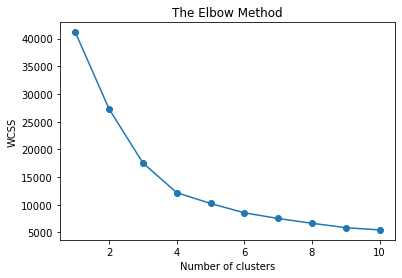

In [136]:
# Plotting the Elbow method graph
plt.figure()
plt.plot(range(1, 11), WCSS, marker='o', label='line with marker')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

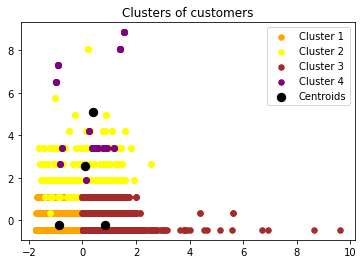

In [139]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
# Use fit_predict to cluster the dataset
km_clusters = kmeans.fit_predict(rfm_std)

rfm_std_cl = pd.DataFrame(rfm_std, columns=rfm.columns, index=rfm.index)
rfm_std_cl['cluster'] = km_clusters

# Visualising the clusters (4 clusters according to the Elbow method)
plt.scatter(rfm_std[km_clusters == 0, 0], rfm_std[km_clusters ==
            0, 1], s=30, c='orange', label='Cluster 1')
plt.scatter(rfm_std[km_clusters == 1, 0], rfm_std[km_clusters ==
            1, 1], s=30, c='yellow', label='Cluster 2')
plt.scatter(rfm_std[km_clusters == 2, 0], rfm_std[km_clusters ==
            2, 1], s=30, c='brown', label='Cluster 3')
plt.scatter(rfm_std[km_clusters == 3, 0], rfm_std[km_clusters ==
            3, 1], s=30, c='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=70, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

Visualizing the clusters

Calculating cluster validation metrics (silhouette score, calinski harabasz score, davies bouldin score)

In [141]:
kmeans_s = silhouette_score(rfm_std, kmeans.labels_, metric='euclidean')
kmeans_c = calinski_harabasz_score(rfm_std, kmeans.labels_)
kmeans_d = davies_bouldin_score(rfm_std, km_clusters)
print('Silhouette Score for K-Means:', kmeans_s)
print('Calinski Harabasz Score for K-Means:', kmeans_c)
print('Davies Bouldin Score for K-Means:', kmeans_d)

Silhouette Score for K-Means: 0.4971721012637513
Calinski Harabasz Score for K-Means: 10853.1923061226
Davies Bouldin Score for K-Means: 0.7457922472871862


Hierarchical Clustering

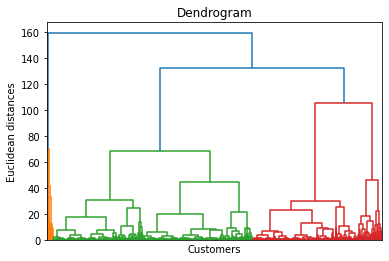

In [142]:
#Plotting the dendogram
plt.figure()
dendrogram = sch.dendrogram(sch.linkage(rfm_std, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.show()

In [143]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(
    n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(rfm_std)

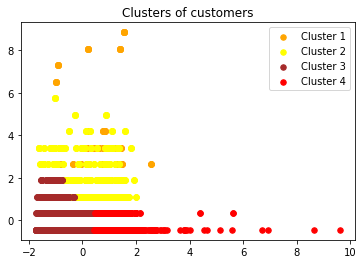

In [144]:
# Visualising the clusters (4 clusters according to the Dendogram)
plt.figure()
plt.scatter(rfm_std[hc_clusters == 0, 0], rfm_std[hc_clusters == 0, 1], s = 30, c = 'orange', label = 'Cluster 1')
plt.scatter(rfm_std[hc_clusters == 1, 0], rfm_std[hc_clusters == 1, 1], s = 30, c = 'yellow', label = 'Cluster 2')
plt.scatter(rfm_std[hc_clusters == 2, 0], rfm_std[hc_clusters == 2, 1], s = 30, c = 'brown', label = 'Cluster 3')
plt.scatter(rfm_std[hc_clusters == 3, 0], rfm_std[hc_clusters == 3, 1], s = 30, c = 'red', label = 'Cluster 4')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [145]:
# Calculating cluster validation metrics
hierarchical_s = silhouette_score(
    rfm_std, hc.labels_, metric='euclidean')
hierarchical_c = calinski_harabasz_score(rfm_std, hc.labels_,)
hierarchical_d = davies_bouldin_score(rfm_std, hc_clusters)
print('Silhouette Score for Hierarchical:', hierarchical_s)
print('Calinski Harabasz Score for Hierarchical:', hierarchical_c)
print('Davies Bouldin Score for Hierarchical:', hierarchical_d)

Silhouette Score for Hierarchical: 0.4571527793212163
Calinski Harabasz Score for Hierarchical: 8814.023577730359
Davies Bouldin Score for Hierarchical: 0.8257241755670588


PCA

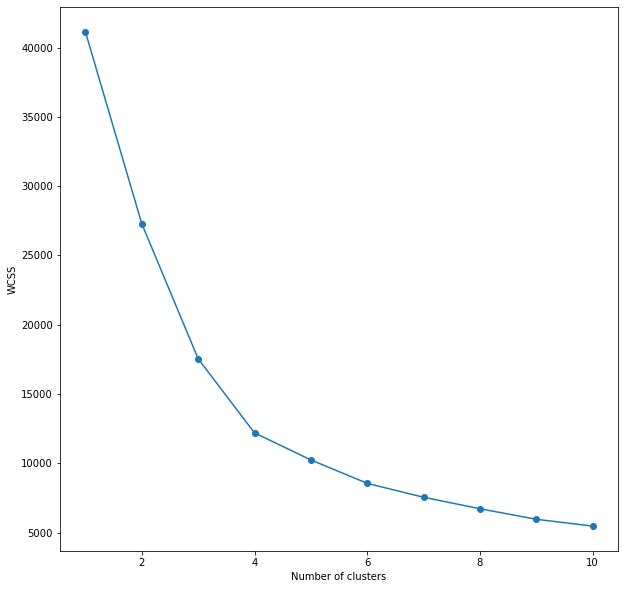

In [146]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(rfm_std)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss, marker='o', label='line with marker')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [156]:
pca = PCA(3)
data2 = pca.fit_transform(rfm_std)

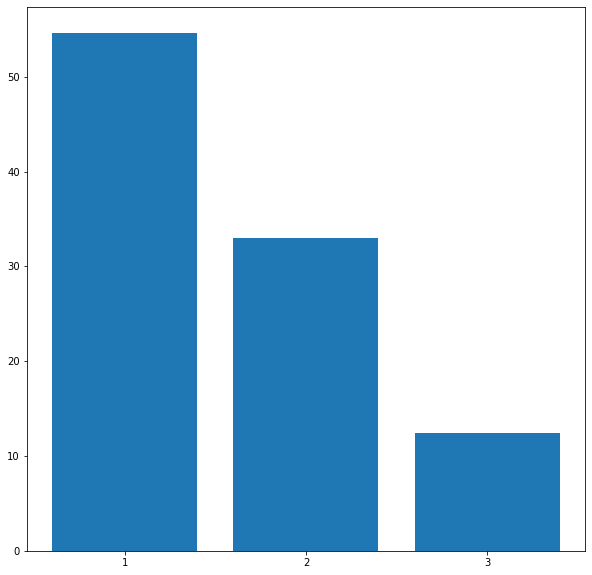

In [157]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

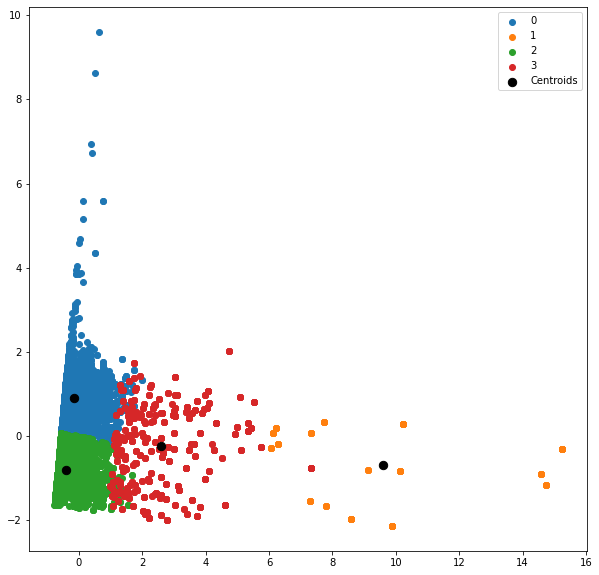

In [158]:
model = KMeans(n_clusters = 4, init = "k-means++")
label = model.fit_predict(data2)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(data2[label == i , 0] , data2[label == i , 1] , label = i)   
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[
            :, 1], s=70, c='black', label='Centroids')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [159]:
pca_s = silhouette_score(data2, model.labels_, metric='euclidean')
pca_c = calinski_harabasz_score(data2, model.labels_)
pca_d = davies_bouldin_score(data2, label)
print('Silhouette Score for PCA:', pca_s)
print('Calinski Harabasz Score for PCA:', pca_c)
print('Davies Bouldin Score for PCA:', pca_d)

Silhouette Score for PCA: 0.49717640016377607
Calinski Harabasz Score for PCA: 10853.14240879577
Davies Bouldin Score for PCA: 0.7463424287838851
